<a href="https://colab.research.google.com/github/ahmedmoustafa/Notebooks/blob/master/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart
---
![heart](https://raw.githubusercontent.com/ahmedmoustafa/Notebooks/master/heart.jpg)

This notebook is analysis of the Cleveland Heart Dataset using Principal component analysis (PCA).

## Dataset

Here is a description of the dataset:

| Variable | Description |
| -- | -- |
| age | age in years |
| sex | sex (1 = male; 0 = female) |
| cp | chest pain type. 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic |
| trestbps | resting blood pressure (in mm Hg on admission to the hospital) |
| chol | serum cholestoral in mg/dl |
| fbs | (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) |
| restecg | resting electrocardiographic results. 0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST, elevation or depression of > 0.05 mV) 2: showing probable or definite left ventricular hypertrophy by Estes\' criteria |
| thalach | maximum heart rate achieved |
| exang | exercise induced angina (1 = yes; 0 = no) |
| oldpeak | ST depression induced by exercise relative to rest |
| slope | the slope of the peak exercise ST segment 1: upsloping, 2: flat, 3: downsloping |
| ca | number of major vessels (0-3) colored by flourosopy |
| thal | 3 = normal; 6 = fixed defect; 7 = reversable defect |
| target | diagnosis of heart disease (1 = yes; 0 = no) |

For more details, see [here](https://github.com/ahmedmoustafa/Notebooks/blob/master/heart.md)

Let's load `tidyverse`

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Loading the Dataset

 Let's load dataset into a table and explore the dataset

In [2]:
heart = read_tsv("https://raw.githubusercontent.com/ahmedmoustafa/Notebooks/master/heart.tsv")
glimpse(heart)


── Column specification ────────────────────────────────────────────────────────
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)




Rows: 303
Columns: 14
$ age      <dbl> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, …
$ sex      <dbl> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, …
$ cp       <dbl> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, …
$ trestbps <dbl> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, …
$ chol     <dbl> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, …
$ fbs      <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, …
$ restecg  <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, …
$ thalach  <dbl> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, …
$ exang    <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, …
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, …
$ slope    <dbl> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, …
$ ca       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, …
$ thal     <dbl> 1, 2, 2, 2, 2

We will explore the dataset using [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis). So we will remove `target` (where 1 = heart disease, and 0 = no heart disease) from the matrix to see if the other 13 parameters can separate between subjects according to the diagnosis of heart disease.

In [3]:
heart2 = heart %>% select (-target) # heart2 is heart without the target (the diagnosis)
glimpse(heart2)

Rows: 303
Columns: 13
$ age      <dbl> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, …
$ sex      <dbl> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, …
$ cp       <dbl> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, …
$ trestbps <dbl> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, …
$ chol     <dbl> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, …
$ fbs      <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, …
$ restecg  <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, …
$ thalach  <dbl> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, …
$ exang    <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, …
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, …
$ slope    <dbl> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, …
$ ca       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, …
$ thal     <dbl> 1, 2, 2, 2, 2

## Basic PCA Steps

In [4]:
pca = prcomp(heart2, scale. = TRUE)
pca

Standard deviations (1, .., p=13):
 [1] 1.6622355 1.2396338 1.1058184 1.0868052 1.0109236 0.9848938 0.9288541
 [8] 0.8808776 0.8478947 0.7883972 0.7280829 0.6504940 0.6098038

Rotation (n x k) = (13 x 13):
                 PC1         PC2         PC3         PC4         PC5
age      -0.31420252  0.40614872 -0.09407661  0.02066180 -0.30715312
sex      -0.09083783 -0.37779171  0.55484915  0.25530873  0.05070440
cp        0.27460749  0.29726609  0.35697431 -0.28790041  0.16317945
trestbps -0.18392019  0.43818675  0.20384930 -0.02260103  0.18813809
chol     -0.11737503  0.36451402 -0.40782498  0.34340982  0.32006670
fbs      -0.07363999  0.31743328  0.48173624  0.06860532 -0.23344184
restecg   0.12772792 -0.22088181 -0.08919083 -0.26609555 -0.39366727
thalach   0.41649811  0.07787618  0.15825529  0.18412539  0.32328431
exang    -0.36126745 -0.26311790 -0.12635610  0.11505621  0.03453568
oldpeak  -0.41963899 -0.05225497  0.11034290 -0.32629597  0.25057927
slope     0.37977222  0.04837415 -0

In [5]:
summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.6622 1.2396 1.10582 1.08681 1.01092 0.98489 0.92885
Proportion of Variance 0.2125 0.1182 0.09406 0.09086 0.07861 0.07462 0.06637
Cumulative Proportion  0.2125 0.3307 0.42481 0.51567 0.59428 0.66890 0.73527
                           PC8    PC9    PC10    PC11    PC12   PC13
Standard deviation     0.88088 0.8479 0.78840 0.72808 0.65049 0.6098
Proportion of Variance 0.05969 0.0553 0.04781 0.04078 0.03255 0.0286
Cumulative Proportion  0.79495 0.8503 0.89807 0.93885 0.97140 1.0000

The above summary is telling us that PC1 and PC2 explain 21% and 11.8% of the variance in the dataset, respectively. And together (cumulatively), they explain about 33% of the variance.

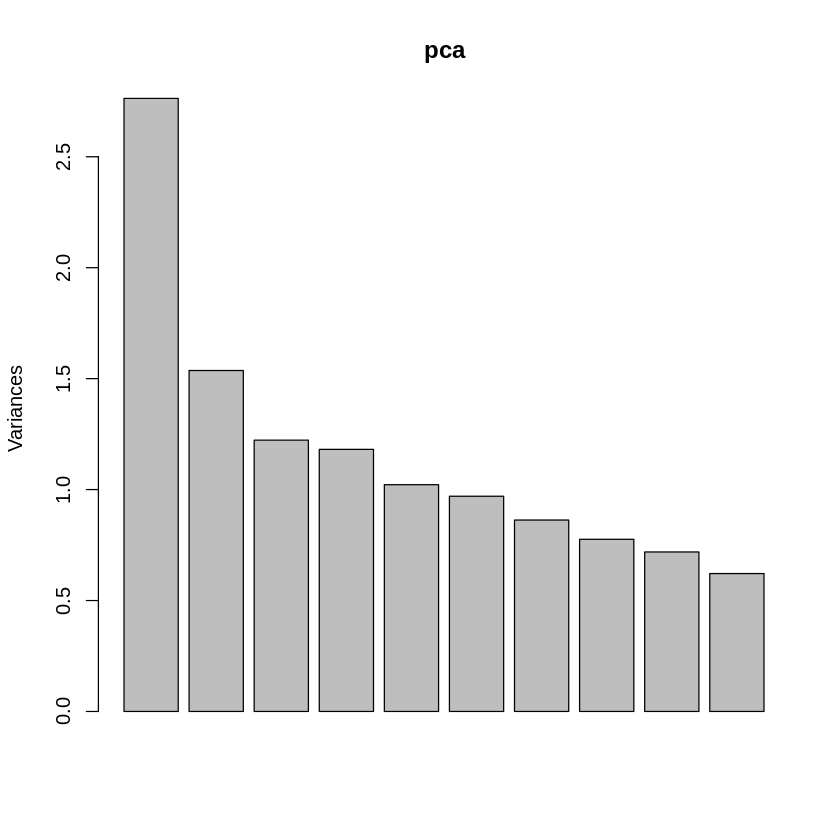

In [6]:
plot(pca)

## Investigating the PCA Result

The projection (coordinates) of the subjects is stored in a matrix called `x` within the generated `pca` object. We will extend the `heart` table with, let's say, the first three principal components as additional columns

In [7]:
heart3 = heart %>% add_column (PC1 = pca$x[, 1], PC2 = pca$x[, 2], PC3 = pca$x[, 3])
glimpse(heart3)

Rows: 303
Columns: 17
$ age      <dbl> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, …
$ sex      <dbl> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, …
$ cp       <dbl> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, …
$ trestbps <dbl> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, …
$ chol     <dbl> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, …
$ fbs      <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, …
$ restecg  <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, …
$ thalach  <dbl> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, …
$ exang    <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, …
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, …
$ slope    <dbl> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, …
$ ca       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, …
$ thal     <dbl> 1, 2, 2, 2, 2

Now, those three additional columns (PC1, PC2, and PC3) provide the coorindates of the subjects (the 303 subjects) onto the first three components (dimensions or axes).

Let's plot the subjects on those dimensions and overlay the target (the diagnosis) to see if there is some structure among the subjects based on the other 13 readings/parameters in the dataset

Note: we need to adjust the table and convert the categorical variables `dbl` (numerical) into `factor`

In [8]:
heart4 = heart3 %>% mutate (sex = factor(sex), cp = factor(cp), fbs = factor(fbs), 
  restecg = factor(restecg), exang = factor(exang), slope = factor(slope), 
  ca = factor(ca), thal = factor(thal), target = factor(target))
  glimpse(heart4)

Rows: 303
Columns: 17
$ age      <dbl> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, …
$ sex      <fct> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, …
$ cp       <fct> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, …
$ trestbps <dbl> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, …
$ chol     <dbl> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, …
$ fbs      <fct> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, …
$ restecg  <fct> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, …
$ thalach  <dbl> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, …
$ exang    <fct> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, …
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, …
$ slope    <fct> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, …
$ ca       <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, …
$ thal     <fct> 1, 2, 2, 2, 2

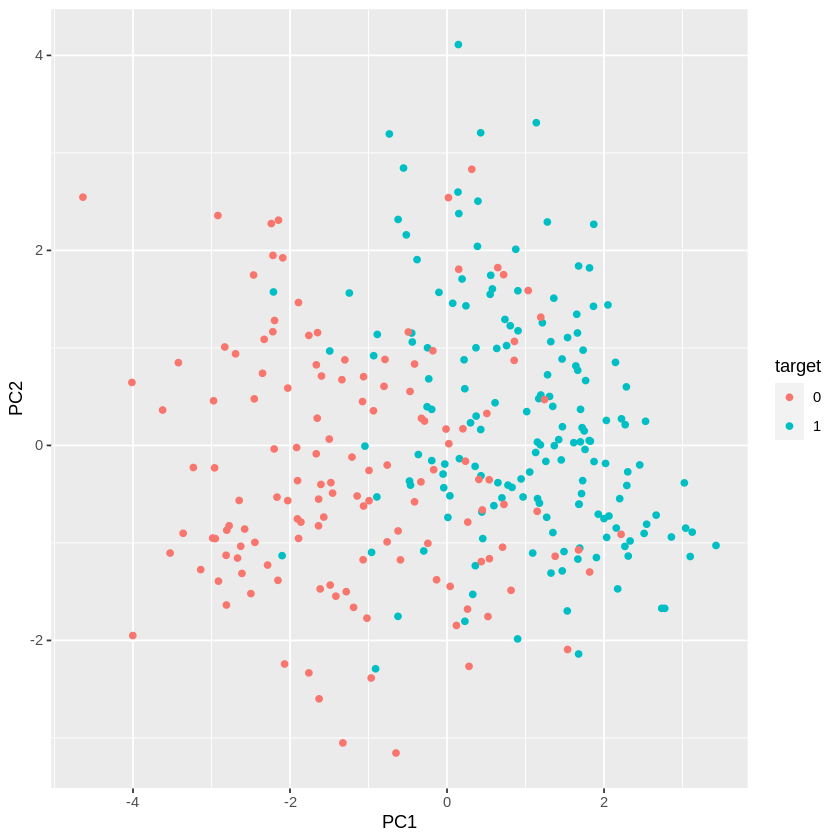

In [9]:
ggplot (heart4) +
  geom_point(aes (x = PC1, y = PC2, color = target))

The above figure clearly shows that based on 13 parameters, there are two subpopulations within the study subjects, **with heart diseases** in blue towards the positive side of PC1 and **without heart disease** in red towards the negative side of PC1.

Now we want to know which of the 13 parameters is driving the separation by PC1. We can look at the loadings on those parameters on PC1 through the `rotation` matrix of the `pca` variable:

In [10]:
pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
age,-0.31420252,0.40614872,-0.09407661,0.02066180,-0.30715312,0.12829615,-0.22373018,0.26247720,0.37900026,0.01672242,0.14054369,0.548235088,-0.181810835
sex,-0.09083783,-0.37779171,0.55484915,0.25530873,0.05070440,-0.05496875,-0.16250682,0.17599193,0.19892520,-0.53561904,0.28760018,-0.011016034,-0.060938085
cp,0.27460749,0.29726609,0.35697431,-0.28790041,0.16317945,0.19341117,-0.21538959,-0.04794993,0.35143235,-0.16435134,-0.59428374,-0.097208286,-0.006350611
trestbps,-0.18392019,0.43818675,0.20384930,-0.02260103,0.18813809,0.17945982,0.33276335,0.59533383,-0.35039179,-0.07152427,0.06413037,-0.258721417,-0.020129600
chol,-0.11737503,0.36451402,-0.40782498,0.34340982,0.32006670,0.10472957,0.04932936,-0.37238051,0.15397520,-0.49516986,0.10887361,-0.183790481,0.007453109
fbs,-0.07363999,0.31743328,0.48173624,0.06860532,-0.23344184,-0.24961364,0.51081821,-0.43286301,0.17700437,0.15369572,0.14210271,0.024729590,0.127166917
restecg,0.12772792,-0.22088181,-0.08919083,-0.26609555,-0.39366727,0.66681339,0.39689590,-0.09984080,0.03830435,-0.26996570,0.09554476,-0.002694377,-0.074442253
thalach,0.41649811,0.07787618,0.15825529,0.18412539,0.32328431,0.12098445,0.10147263,-0.14346128,-0.37204449,-0.03081265,0.03250678,0.608911322,-0.316691808
exang,-0.36126745,-0.26311790,-0.12635610,0.11505621,0.03453568,-0.23069914,0.44991859,0.11260655,0.05850023,-0.19873186,-0.61590127,0.239078602,-0.148726741
oldpeak,-0.41963899,-0.05225497,0.11034290,-0.32629597,0.25057927,0.17007984,-0.11288781,-0.19232320,-0.23360295,-0.11138417,0.01524183,0.340832606,0.614575447


We can plot the loading on PC1 as a barplot to see the direction and magnitude of the contributions of the different parameters:

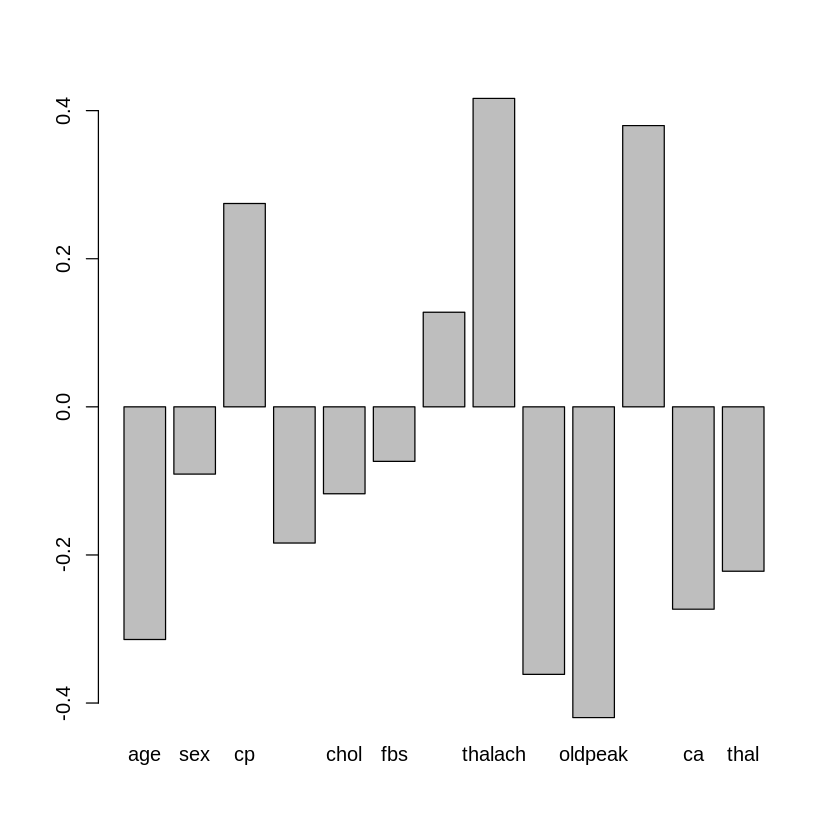

In [11]:
barplot(pca$rotation[, 1])

And here is a `ggplot` version of the above barplot

In [12]:
 # This is to extract the loadings from the pca variable
 # The row names of the rotation matrix will be used as a new column,
 # which we are going to call it parameter
 # Then the data.frame is converted in tibble (a tidyverse structure for tables)

loadings = rownames_to_column(as.data.frame(pca$rotation), var = "parameter") %>% as_tibble()
loadings

parameter,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,-0.31420252,0.40614872,-0.09407661,0.02066180,-0.30715312,0.12829615,-0.22373018,0.26247720,0.37900026,0.01672242,0.14054369,0.548235088,-0.181810835
sex,-0.09083783,-0.37779171,0.55484915,0.25530873,0.05070440,-0.05496875,-0.16250682,0.17599193,0.19892520,-0.53561904,0.28760018,-0.011016034,-0.060938085
cp,0.27460749,0.29726609,0.35697431,-0.28790041,0.16317945,0.19341117,-0.21538959,-0.04794993,0.35143235,-0.16435134,-0.59428374,-0.097208286,-0.006350611
trestbps,-0.18392019,0.43818675,0.20384930,-0.02260103,0.18813809,0.17945982,0.33276335,0.59533383,-0.35039179,-0.07152427,0.06413037,-0.258721417,-0.020129600
chol,-0.11737503,0.36451402,-0.40782498,0.34340982,0.32006670,0.10472957,0.04932936,-0.37238051,0.15397520,-0.49516986,0.10887361,-0.183790481,0.007453109
fbs,-0.07363999,0.31743328,0.48173624,0.06860532,-0.23344184,-0.24961364,0.51081821,-0.43286301,0.17700437,0.15369572,0.14210271,0.024729590,0.127166917
restecg,0.12772792,-0.22088181,-0.08919083,-0.26609555,-0.39366727,0.66681339,0.39689590,-0.09984080,0.03830435,-0.26996570,0.09554476,-0.002694377,-0.074442253
thalach,0.41649811,0.07787618,0.15825529,0.18412539,0.32328431,0.12098445,0.10147263,-0.14346128,-0.37204449,-0.03081265,0.03250678,0.608911322,-0.316691808
exang,-0.36126745,-0.26311790,-0.12635610,0.11505621,0.03453568,-0.23069914,0.44991859,0.11260655,0.05850023,-0.19873186,-0.61590127,0.239078602,-0.148726741


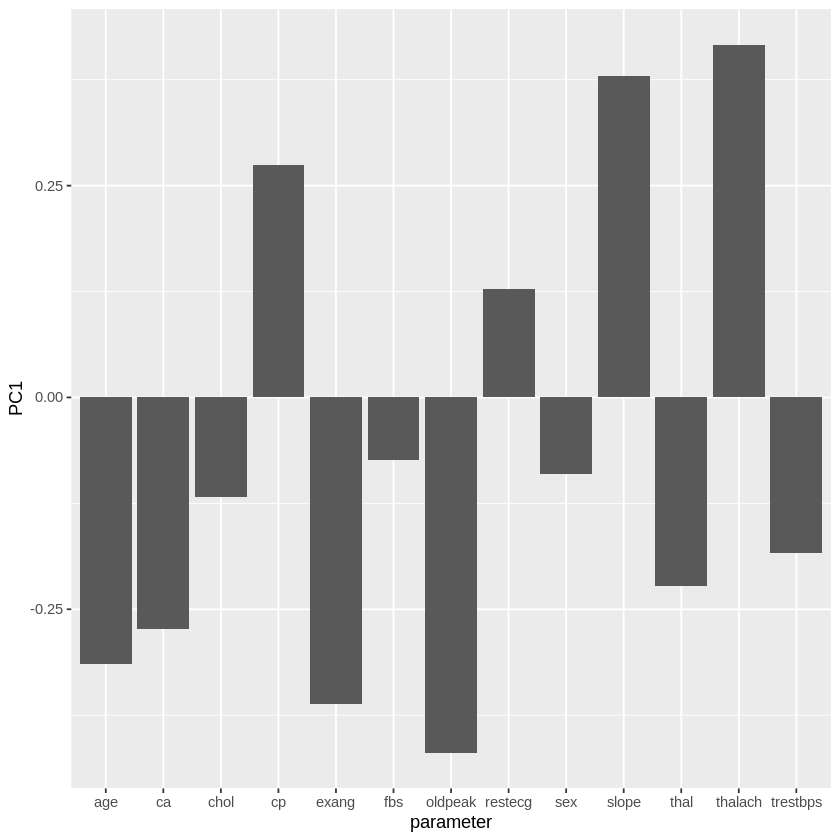

In [13]:
ggplot(loadings) +
geom_bar(aes(x = parameter, y = PC1), stat = "identity")

It can be helpful to rearrange the bars (parameters) on the x-axis according to the values of the loadings on the y-axis

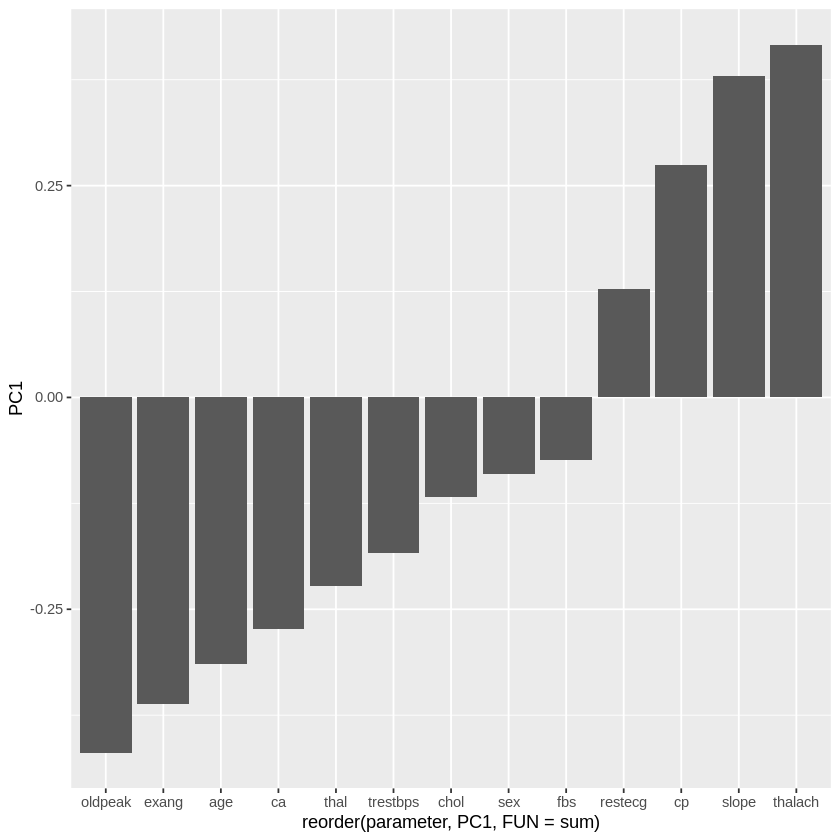

In [14]:
ggplot(loadings) +
geom_bar(aes(x = reorder (parameter, PC1, FUN = sum), y = PC1), stat = "identity")

The bars can also be colored according to their heights

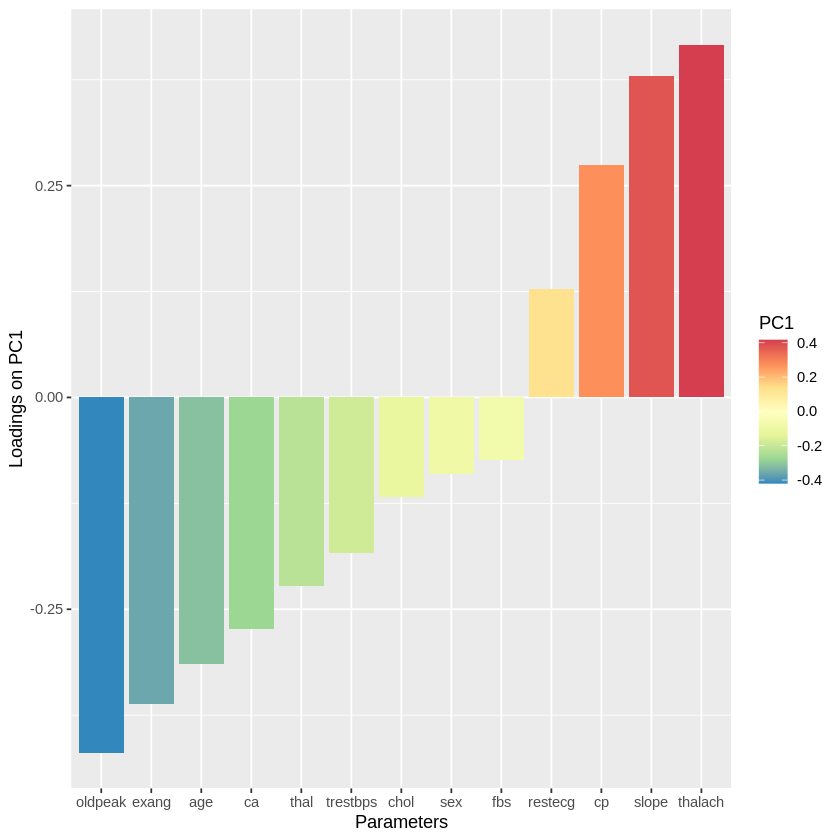

In [15]:
ggplot(loadings) +
geom_bar(aes(x = reorder (parameter, PC1, FUN = sum), y = PC1, fill = PC1), stat = "identity") +
scale_fill_distiller(palette = "Spectral") +
labs (x = "Parameters", y = "Loadings on PC1")

The above figure tells us that `oldpeak` ([ST depression induced by exercise relative to rest](https://en.wikipedia.org/wiki/ST_depression)) is the largest contributor to PC1 on the negative side. At the same time `thalach` ([maximum heart rate achieved](https://www.cdc.gov/physicalactivity/basics/measuring/heartrate.htm)) is the largest contributor on the positive side PC1.

## Statistical Significance

Now we can use t-test to see if `oldpeak` is actually statistically different between the two groups, `target` = 1 and `target` = 0. To do that, we need to breakdown the dataset into two subsets according to the value `target`

In [16]:
target0 =  heart4 %>% filter (target == 0)
glimpse(target0)

Rows: 138
Columns: 17
$ age      <dbl> 67, 67, 62, 63, 53, 56, 48, 58, 58, 60, 40, 60, 64, 43, 57, …
$ sex      <fct> 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, …
$ cp       <fct> 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, …
$ trestbps <dbl> 160, 120, 140, 130, 140, 130, 110, 120, 132, 130, 110, 117, …
$ chol     <dbl> 286, 229, 268, 254, 203, 256, 229, 284, 224, 206, 167, 230, …
$ fbs      <fct> 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, …
$ restecg  <fct> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, …
$ thalach  <dbl> 108, 129, 160, 147, 155, 142, 168, 160, 173, 132, 114, 160, …
$ exang    <fct> 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, …
$ oldpeak  <dbl> 1.5, 2.6, 3.6, 1.4, 3.1, 0.6, 1.0, 1.8, 3.2, 2.4, 2.0, 1.4, …
$ slope    <fct> 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, …
$ ca       <fct> 3, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 3, 0, 1, 0, …
$ thal     <fct> 2, 3, 2, 3, 3

In [17]:
target1 =  heart4 %>% filter (target == 1)
glimpse(target1)

Rows: 165
Columns: 17
$ age      <dbl> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, …
$ sex      <fct> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, …
$ cp       <fct> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, …
$ trestbps <dbl> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, …
$ chol     <dbl> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, …
$ fbs      <fct> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, …
$ restecg  <fct> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, …
$ thalach  <dbl> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, …
$ exang    <fct> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, …
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, …
$ slope    <fct> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, …
$ ca       <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, …
$ thal     <fct> 1, 2, 2, 2, 2

In [18]:
t.test(target0$oldpeak, target1$oldpeak)


	Welch Two Sample t-test

data:  target0$oldpeak and target1$oldpeak
t = 7.9386, df = 215.68, p-value = 1.11e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.753577 1.251377
sample estimates:
mean of x mean of y 
1.5855072 0.5830303 


The p-value from the above t-test is 1.11e-13 (see [the E notation](https://stattrek.com/statistics/dictionary.aspx?definition=e-notation)) << 0.05, which is super significant.

Finally, let's also visualize the distribution of `oldpeak` betweenn the two groups, `target` = 0, and `target` = 1

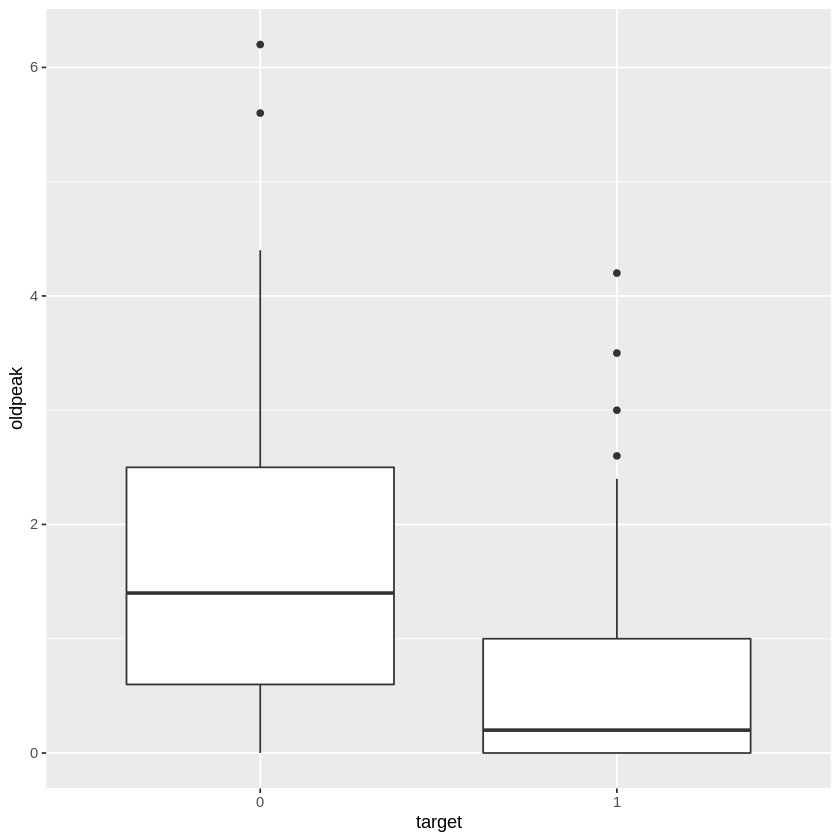

In [19]:
ggplot(heart4) +
  geom_boxplot(aes(x = target, y = oldpeak))

The boxplot above shows that there a significant difference between the values of `oldpeak` in the two groups `target` = 1 and `target` = 0

## Summary

- We started with PCA to **explore**
- PCA showed that there were subpopulations among the subjects
- The separation between the two subpopulations was due to PC1
- PCA indicated that `oldpeak` was a major contributor to PC1
- t-test supported the observation with a significant **p-value**

---

![Correlatio](https://imgs.xkcd.com/comics/correlation.png)

---

Thank you 🙏 and warmest wishes 😊